##Descargar librerías importantes

In [1]:
!python -m pip install 'fsspec>=0.3.3'

     |████████████████████████████████| 132 kB 5.3 MB/s 


In [2]:
print('NOTE: Intentionally crashing session to use the newly installed library.\n')

!pip uninstall -y pyarrow
!pip install ray[debug]==0.7.5
!pip install bs4

# A hack to force the runtime to restart, needed to include the above dependencies.


NOTE: Intentionally crashing session to use the newly installed library.

Found existing installation: pyarrow 3.0.0
Uninstalling pyarrow-3.0.0:
  Successfully uninstalled pyarrow-3.0.0
     |████████████████████████████████| 74.9 MB 1.5 MB/s 
     |████████████████████████████████| 119 kB 35.4 MB/s 
     |████████████████████████████████| 3.0 MB 9.1 MB/s 


In [13]:
import numpy as np #manejo de matrices y vectores
import scipy as sp  #libreria para data science
import pandas as pd # manejo de la información
import matplotlib.pyplot as plt # visualizacion
import seaborn as sns # visualizacion
import dask.dataframe as dd 
import os, psutil
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string

In [14]:
import os
#os._exit(0)
!pip install -U ipykernel
!pip install modin[all]
!pip install modin

In [5]:
!pip install emoji

     |████████████████████████████████| 170 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=11f68ad251401f8bff3652a1f0ff3632905e41636a7467a4fffc8dd5402395d3
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


##Entorno Modin

In [1]:
import os
os.environ["MODIN_ENGINE"] = "ray"
import modin.pandas as pd
import numpy as np #Manejo de matrices y vectores
import scipy as sp #libreria para data science
#import pandas as pd #Manejo de iformacióón
import matplotlib.pyplot as plt #Visualización
import seaborn as sns #Visualización

In [2]:
# Importar librerias
import pandas as pda
import pyarrow.parquet as pq
import sqlite3
import dask.dataframe as dd
#import pyarrow.dataset as ds

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lectura de datos

In [15]:
%%time
df_submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/Proyecto/Data/submit.csv')   
print(psutil.Process().memory_info().rss / (1024 * 1024))




330.41796875
CPU times: user 5.49 ms, sys: 2.5 ms, total: 7.99 ms
Wall time: 10.8 ms


In [16]:
%%time
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/Proyecto/Data/train.csv')   
# df_train.columns = ["numero de origen","numero de destino","tipo de llamada","duración de llamada (seg)","numero de llamadas","numero de sms"]
print(psutil.Process().memory_info().rss / (1024 * 1024))


602.53515625
CPU times: user 1.39 s, sys: 284 ms, total: 1.67 s
Wall time: 1.82 s


In [17]:
%%time
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData/Proyecto/Data/test.csv')   
# df_test.columns = ["numero de origen","numero de destino","tipo de llamada","duración de llamada (seg)","numero de llamadas","numero de sms"]
print(psutil.Process().memory_info().rss / (1024 * 1024))


604.6875
CPU times: user 330 ms, sys: 21.5 ms, total: 352 ms
Wall time: 395 ms


In [18]:
df_submit

,id,label
0,20800,0
1,20801,1
2,20802,0
3,20803,1
4,20804,1
...,...,...
5195,25995,0
5196,25996,1
5197,25997,0
5198,25998,1


In [19]:
display((df_submit.count(), len(df_submit.columns)))

(id       5200
 label    5200
 dtype: int64,
 2)

In [20]:
display(df_test)

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [21]:
df_test[df_test.id == 20800]

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."


In [22]:
%%time
df_submit_label = df_submit["label"]
df_test = pd.concat([df_test, df_submit_label], axis=1,)
df_test
print(psutil.Process().memory_info().rss / (1024 * 1024))

605.12890625
CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 8.72 ms


## Eliminar nulos

In [23]:
# df_test[df_test.text.isNull()]
df_test[df_test.text == " "].count()

id        31
title     31
author    31
text      31
label     31
dtype: int64

In [24]:
%%time
df_test = df_test[df_test.text != " "]
print(psutil.Process().memory_info().rss / (1024 * 1024))

605.18359375
CPU times: user 4.54 ms, sys: 1 ms, total: 5.54 ms
Wall time: 4.99 ms


In [25]:
df_test.count()

id        5169
title     5047
author    4666
text      5162
label     5169
dtype: int64

In [26]:
display(type(df_test))
display((df_test.count(), len(df_test.columns)))

pandas.core.frame.DataFrame

(id        5169
 title     5047
 author    4666
 text      5162
 label     5169
 dtype: int64,
 5)

In [27]:
display(df_train)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [28]:
%%time

df_train = df_train[df_train.text != " "]
print(psutil.Process().memory_info().rss / (1024 * 1024))



606.13671875
CPU times: user 9.79 ms, sys: 1.77 ms, total: 11.6 ms
Wall time: 18 ms


## Procesamiento de datos

In [29]:
display(df_train)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [30]:
display(df_test)

,id,title,author,text,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",0
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,0
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",1
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,1
...,...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...,0
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...,1
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...,0
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...,1


In [31]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'while', 'any', 'am', 'a', 'herself', 'to', 'those', 'only', 'some', 'or', 'more', "isn't", 'did', 'own', 'as', 'isn', "won't", 'didn', 'ourselves', 'your', 'don', 'up', 'no', 'does', 'above', 'this', 'was', 'they', "hasn't", 'that', 'after', 'hasn', 'hers', 'for', "hadn't", 'between', 'aren', 'further', 'shan', 'can', 'haven', 'weren', 'at', 'have', 'too', 'doesn', "you've", 'were', 'by', 'all', 'nor', 'are', 'ain', 'because', 'mightn', "shouldn't", 'wasn', 'won', 'and', 'here', "mightn't", 'same', 'if', 'under', 'how', 'very', "wouldn't", 'before', 'not', 't', 'during', 'wouldn', 'yourself', 'his', 'you', "it's", 'it', 'has', 'once', 'both', 'hadn', 'will', 'but', 'out', 'll', "haven't", 'been', 'until', 'down', 'whom', 'over', 're', 'had', 'do', 'needn', 'their', 'ma', 'he', 'themselves', 'such', 'couldn', 'who', 'she', 'yours', "should've", 'again', "couldn't", 'which', 'o', 'y', 'ours', 'where', 'on', 'theirs', 'now', 'below', 'against', 'my', 'each', 'doing', 'i', 'few', 'into',

In [33]:
import emoji
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)

In [34]:
def preprocess_new_text(tweet):
  emoticon_string = r"""
  (?:
    [<>]?
    [:;=8]                     
    [\-o\*\']?                 
    [\)\]\(\[dDpP/\:\}\{@\|\\]       
    |
    [\)\]\(\[dDpP/\:\}\{@\|\\]
    [\-o\*\']?                 
    [:;=8]                     
    [<>]?
  )"""

  replacements = (
    ("á", "a"),
    ("é", "e"),
    ("í", "i"),
    ("ó", "o"),
    ("ú", "u"),
  )

  tweet = str(tweet)
  tweet = tweet.lower()
  # Remove urls
  tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
  # Remove user @ references and '#' from tweet
  tweet = re.sub(r'\@\w+|\#','', tweet)
  # Remove user ¿ and ¡ from tweet
  tweet = re.sub(r'\¿|\¡|\?|\!','', tweet)
  # Remove punctuations
  tweet = tweet.translate(str.maketrans('', '', string.punctuation))
  # remove graphical emoji
  tweet = give_emoji_free_text(tweet) 
  # remove textual emoji
  tweet = re.sub(emoticon_string,'',tweet)
  #remove accent mark
  for a, b in replacements:
    tweet = tweet.replace(a, b)

  # Remove stopwords
  tweet_tokens = word_tokenize(tweet)
  filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
  return " ".join(filtered_words)

## Pre-procesamiento

In [35]:
%%time
df_train.text = df_train['text'].apply(preprocess_new_text)
print(psutil.Process().memory_info().rss / (1024 * 1024))


695.43359375
CPU times: user 15min 3s, sys: 1.73 s, total: 15min 5s
Wall time: 15min 37s


In [36]:
%%time
df_test.text = df_test['text'].apply(preprocess_new_text)
print(psutil.Process().memory_info().rss / (1024 * 1024))

695.734375
CPU times: user 3min 47s, sys: 517 ms, total: 3min 48s
Wall time: 3min 48s


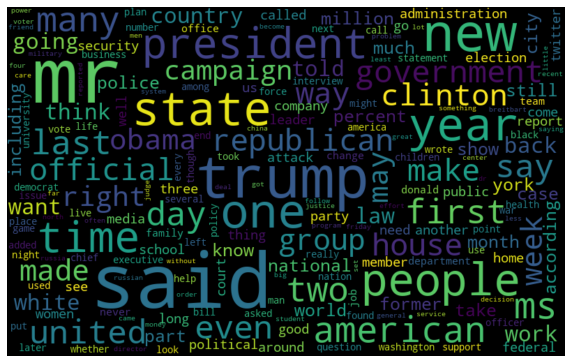

In [37]:
#Ploteo de palabras mas relevantes de tipo fake news.

from wordcloud import WordCloud
fake_data = df_train[df_train["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Modelamiento

In [39]:
from nltk.stem import PorterStemmer
import re
import tensorflow
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot




In [41]:
%%time
embedding_vector_features = 40
voc_size = 5000
sent_length = 20
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
print(psutil.Process().memory_info().rss / (1024 * 1024))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None
1277.046875
CPU times: user 410 ms, sys: 8.1 ms, total: 418 ms
Wall time: 418 ms


In [51]:
%%time
voc_size = 5000
onehot_repre = [one_hot(words, voc_size) for words in df_train.text]
print(psutil.Process().memory_info().rss / (1024 * 1024))
onehot_repre[0]

1896.109375
CPU times: user 13.8 s, sys: 527 ms, total: 14.3 s
Wall time: 15.3 s


[2007,
 3435,
 1122,
 4114,
 2611,
 3936,
 3381,
 4114,
 1394,
 154,
 3693,
 1263,
 3326,
 3562,
 747,
 1164,
 3941,
 2812,
 154,
 3693,
 2269,
 2311,
 2924,
 291,
 1639,
 183,
 4315,
 1798,
 3481,
 4711,
 1338,
 797,
 1799,
 1698,
 4176,
 4271,
 4409,
 3246,
 1459,
 1406,
 1252,
 4585,
 3381,
 3620,
 2007,
 2828,
 1122,
 4358,
 1531,
 4833,
 2956,
 4813,
 3246,
 2173,
 888,
 3381,
 1553,
 2108,
 1394,
 880,
 4325,
 1411,
 1334,
 4076,
 45,
 1876,
 2951,
 4114,
 4695,
 112,
 1712,
 4884,
 3552,
 4235,
 4114,
 2735,
 3381,
 4465,
 2439,
 1457,
 3713,
 4430,
 2913,
 747,
 2956,
 3381,
 2163,
 4430,
 747,
 2828,
 1712,
 3224,
 2007,
 4468,
 2471,
 422,
 4235,
 602,
 3236,
 1334,
 840,
 2194,
 2962,
 3936,
 1792,
 170,
 7,
 4823,
 1394,
 3228,
 422,
 2913,
 3833,
 154,
 3693,
 651,
 651,
 1459,
 3395,
 1457,
 4325,
 3578,
 1774,
 4325,
 3773,
 207,
 1334,
 2606,
 481,
 1562,
 311,
 3590,
 620,
 154,
 3693,
 747,
 1636,
 3941,
 2286,
 2956,
 311,
 3381,
 1547,
 4832,
 3236,
 1334,
 2265,
 2

In [43]:

embedded_docs = pad_sequences(onehot_repre, padding='pre', maxlen=sent_length)
print(embedded_docs[0])

[1254 3835 3053 4076 2956 3415 1586 3362 3435 1780 2672 3946 2119 4925
 2124 3284 3326 1397 2373 2119]


In [44]:
Y = df_train.label  
x_final = np.array(embedded_docs)
y_final = np.array(Y)

In [45]:
x_final.shape, y_final.shape

((20725, 20), (20725,))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.33, random_state=42)

In [47]:
%%time
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
print(psutil.Process().memory_info().rss / (1024 * 1024))

Epoch 1/10
217/217 [==============================] - 26s 82ms/step - loss: 0.4168 - accuracy: 0.8052 - val_loss: 0.3111 - val_accuracy: 0.8586
Epoch 2/10
217/217 [==============================] - 10s 44ms/step - loss: 0.2369 - accuracy: 0.9032 - val_loss: 0.2982 - val_accuracy: 0.8659
Epoch 3/10
217/217 [==============================] - 9s 40ms/step - loss: 0.1743 - accuracy: 0.9345 - val_loss: 0.3234 - val_accuracy: 0.8639
Epoch 4/10
217/217 [==============================] - 9s 40ms/step - loss: 0.1243 - accuracy: 0.9562 - val_loss: 0.3728 - val_accuracy: 0.8607
Epoch 5/10
217/217 [==============================] - 9s 41ms/step - loss: 0.0773 - accuracy: 0.9736 - val_loss: 0.4396 - val_accuracy: 0.8566
Epoch 6/10
217/217 [==============================] - 10s 47ms/step - loss: 0.0514 - accuracy: 0.9834 - val_loss: 0.5376 - val_accuracy: 0.8523
Epoch 7/10
217/217 [==============================] - 9s 42ms/step - loss: 0.0326 - accuracy: 0.9914 - val_loss: 0.6349 - val_accuracy: 0.8

In [48]:
%%time
classes_x = (model.predict(X_test) > 0.5).astype("int32")
print(psutil.Process().memory_info().rss / (1024 * 1024))

1593.9296875
CPU times: user 2.65 s, sys: 108 ms, total: 2.76 s
Wall time: 2.04 s


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classes_x)

array([[2858,  589],
       [ 448, 2945]])

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,classes_x)

0.848391812865497